# Import required libraries

In [1]:
import pandas as pd
import sklearn.model_selection as skms

# Utility functions

In [2]:
def compute_confusion_matrix(sufix, y_test, y_pred):

    labels = [False, True]

    # Compute the confusion matrix
    conf_matrix = skmt.confusion_matrix(y_test, y_pred, labels=labels)
    print(f"[{sufix}]confusion matrix:\n",conf_matrix)

    if len(conf_matrix[0]) == 1:
        print("Skipping ConfusionMatrixDisplay because a single label was found in 'y_true' and 'y_pred'.")
        return

    # Create a display object for the confusion matrix
    disp = skmt.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Granted", "Granted"])

    # Plot the confusion matrix
    disp.plot(cmap=plt.cm.Blues, values_format=".0f")
    plt.title(f"[{sufix}] Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


def plot_class_distribution_train_test_sets(X_train, y_train, X_test, y_test):
    # Combine X_train with y_train
    train_df = pd.concat([X_train, y_train], axis=1)

    # Combine X_test with y_test
    test_df = pd.concat([X_test, y_test], axis=1)

    # Add a column to indicate the source of the data (train or test)
    train_df['Set'] = 'Train'
    test_df['Set'] = 'Test'

    # Concatenate the two DataFrames
    combined_data = pd.concat([train_df, test_df])

    # Define custom colors for Train and Test
    custom_colors = ['#e74c3c', '#228B22']  # e.g., red for False, green for True

    # Plot the class distribution
    plt.figure()
    ax = sns.countplot(data=combined_data, x='Set', hue='scholarship', palette=custom_colors)
    plt.title('Class Distribution in Train and Test Sets')
    plt.xlabel('Scholarship')
    plt.ylabel('Count')
    plt.legend(title='Dataset')

    # Specify title and labels
    plt.title('Class Distribution in Train and Test Sets')
    plt.xlabel('Datasets')
    plt.ylabel('Count')
    plt.legend(title='Scholarship')  

    # Add count values on top of each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

    # Show the plot
    plt.show()

def evaluate_classifier(y_test, y_pred):
    # Compute and print Accuracy
    accuracy_score = skmt.accuracy_score(y_test, y_pred)
    print('Accuracy: %.2f' % (accuracy_score*100))

    # Compute and print Balanced Accuracy
    balanced_accuracy = skmt.balanced_accuracy_score(y_test, y_pred)
    print('Balanced Accuracy: %.2f' % (balanced_accuracy*100))

    # Compute and show confusion matrix
    compute_confusion_matrix('General',y_test, y_pred)

def show_scholarship_prediction_results(classifier, X_test, y_test, y_pred):
    print(f'\n*************************************** {classifier} ***************************************')
    
    # Accuracy scores
    print("Accuracy:",round(skmt.accuracy_score(y_test,y_pred)*100,2),"%")
    
    # General confusion matrix
    compute_confusion_matrix('General',y_test, y_pred)

    df1 =  pd.DataFrame(X_test)
    df1['scholarship'] = y_test
    df1['prediction'] = y_pred

    df_male = df1[(df1['gender'] == 0) & (df1['married']) == 0] # Single male
    df_female = df1[(df1['gender'] == 1) & (df1['married']) == 1] # Married female

     # confusion matrix per gender and civil status
    compute_confusion_matrix('Married female', df_female['scholarship'], df_female['prediction'])
    compute_confusion_matrix('Single male', df_male['scholarship'], df_male['prediction'])

    print('***********************************************************************************')


# Load dataset

In [3]:
dataset_ulr = 'https://raw.githubusercontent.com/leticiaarco/practical_ethical_ai_resources/refs/heads/main/scholarship.csv'
data = pd.read_csv(dataset_ulr)
data.head()
df = pd.DataFrame(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary       120 non-null    float64
 1   gender       120 non-null    object 
 2   married      120 non-null    object 
 3   achievement  120 non-null    float64
 4   scholarship  120 non-null    bool   
dtypes: bool(1), float64(2), object(2)
memory usage: 4.0+ KB


### <span style="color:red">Hands-on exercise 1: Analyse data</span>
<span style="color:red">a) Analyse the collected data</span>  
<span style="color:red">b) Identify issues that could influence results</span>  
<span style="color:red">c) Improve the ‘data handling’ step</span>  
<span style="color:red">d) Summarise your main findings from the data analysis carried out</span>

##### <span style="color:red">Scholarship per gender</span>

Import

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Group by 'gender' and count scholarships

In [5]:
scholarship_granted = df[df['scholarship']].groupby('gender').size()
scholarship_nogranted = df[~df['scholarship']].groupby('gender').size()

feature_values = (
    "Females",
    "Males",
)

weight_counts = {
    "Granted": np.array([scholarship_granted.get('F', 0), scholarship_granted.get('M', 0)]),
    "Not Granted": np.array([scholarship_nogranted.get('F', 0), scholarship_nogranted.get('M', 0)]),
}

Plot scholarship per gender

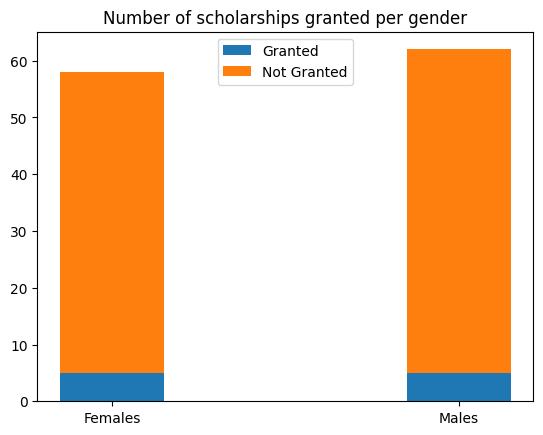

In [6]:
width = 0.3

fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(feature_values, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of scholarships granted per gender")
ax.legend(loc="upper center")

plt.show()

##### <span style="color:red">Scholarship per civil status</span>

Group by 'married' and count scholarships

In [7]:
scholarship_granted = df[df['scholarship']].groupby('married').size()
scholarship_nogranted = df[~df['scholarship']].groupby('married').size()

feature_values = (
    "Single",
    "Married",
)

weight_counts = {
    "Granted": np.array([scholarship_granted.get('N', 0), scholarship_granted.get('Y', 0)]),
    "Not Granted": np.array([scholarship_nogranted.get('N', 0), scholarship_nogranted.get('Y', 0)]),
}

Plot scholarship per civil status

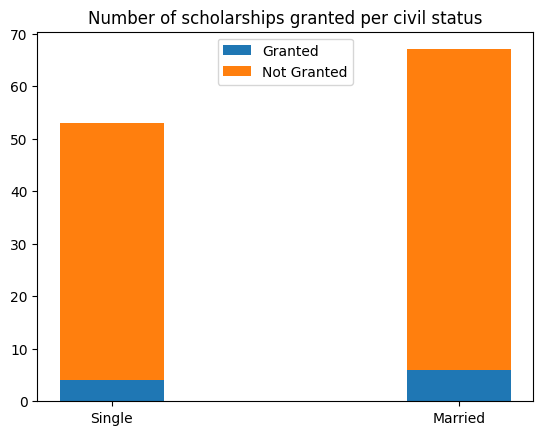

In [8]:
width = 0.3

# Plot scholarship per civil status
fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(feature_values, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of scholarships granted per civil status")
ax.legend(loc="upper center")

plt.show()

##### <span style="color:red">Gender vs civil status</span>

Group by 'married' and count per gender

In [9]:
females = df[df['gender'] == 'F' ].groupby('married').size()
males = df[df['gender'] == 'M'].groupby('married').size()

feature_values = (
    "Females",
    "Males",   
)

weight_counts = {
    "Single": np.array([females.get('N', 0), males.get('N', 0)]),
    "Married": np.array([females.get('Y', 0), males.get('Y', 0)]),
}

Plot gender vs civil status

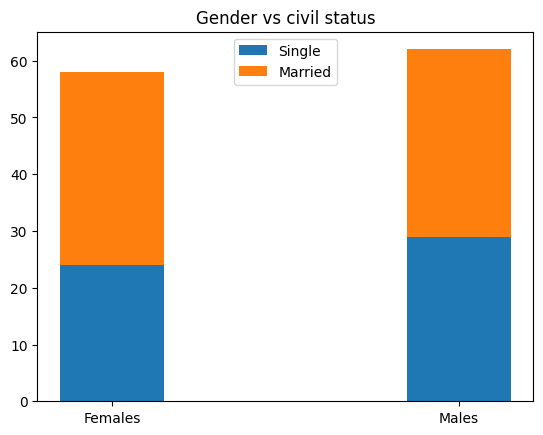

In [10]:
width = 0.3

fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(feature_values, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Gender vs civil status")
ax.legend(loc="upper center")

plt.show()

##### <span style="color:red">Achievement per class (scholarship=TRUE and scholarship=FALSE)</span>

Import

In [11]:
import seaborn as sns

Plot achievement per class

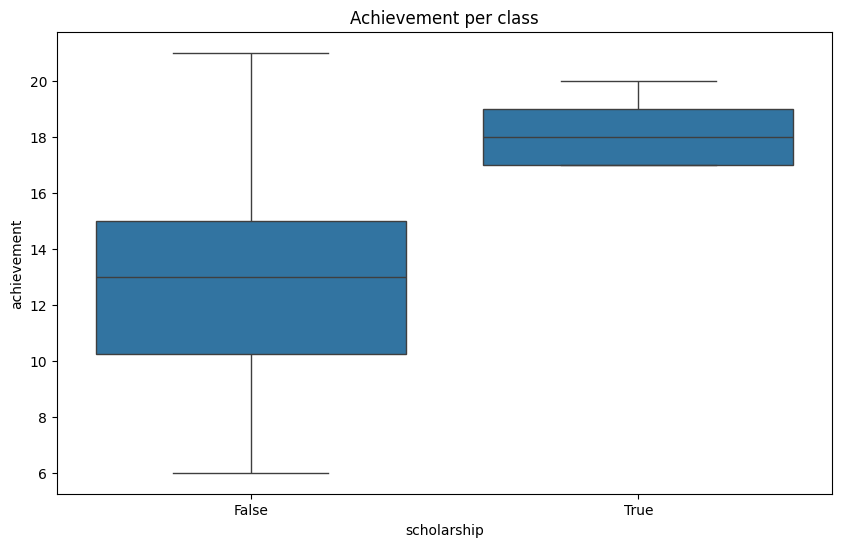

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='scholarship', y='achievement', data=data)
plt.xlabel('scholarship')
plt.ylabel('achievement')
plt.title('Achievement per class')
plt.show()

##### <span style="color:red">Salary per class (scholarship=TRUE and scholarship=FALSE)</span>

Plot salary per class

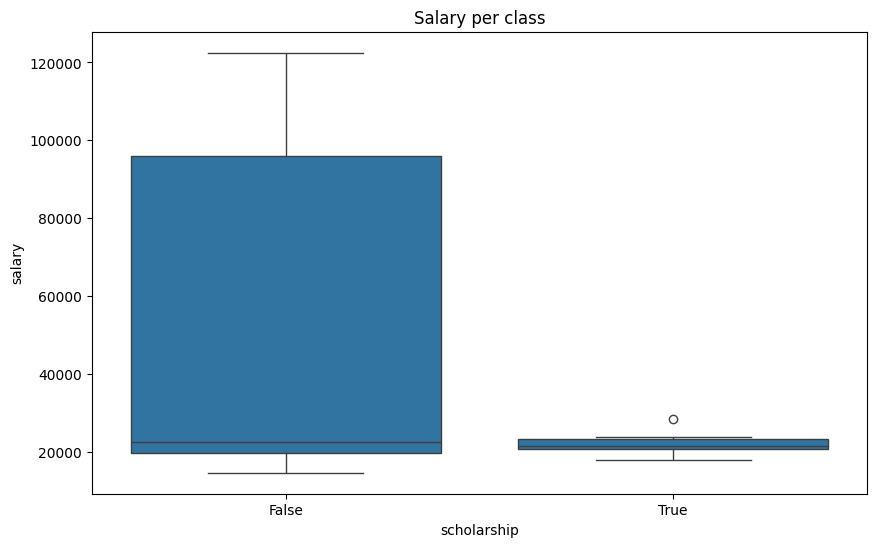

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='scholarship', y='salary', data=data)
plt.xlabel('scholarship')
plt.ylabel('salary')
plt.title('Salary per class')
plt.show()

##### <span style="color:red">(Gender + Married) vs Scholarship</span>

Groupby scholarship and count by gender and civil status

In [14]:
married_females = df[(df['gender'] == 'F') & (df['married'] == 'Y') ].groupby('scholarship').size()
married_males = df[(df['gender'] == 'M') & (df['married'] == 'Y')].groupby('scholarship').size()
single_females = df[(df['gender'] == 'F') & (df['married'] == 'N') ].groupby('scholarship').size()
single_males = df[(df['gender'] == 'M') & (df['married'] == 'N')].groupby('scholarship').size()

feature_values = (
    "Single Females",
    "Married Females",
    "Single Males",
    "Married Males"
)

weight_counts = {
    "Granted": np.array([single_females.get(True, 0), married_females.get(True, 0), single_males.get(True, 0), married_males.get(True, 0)]),
    "Not Granted": np.array([single_females.get(False, 0),married_females.get(False, 0), single_males.get(False, 0), married_males.get(False, 0)]),
}

Plot (Gender + Married) vs Scholarship

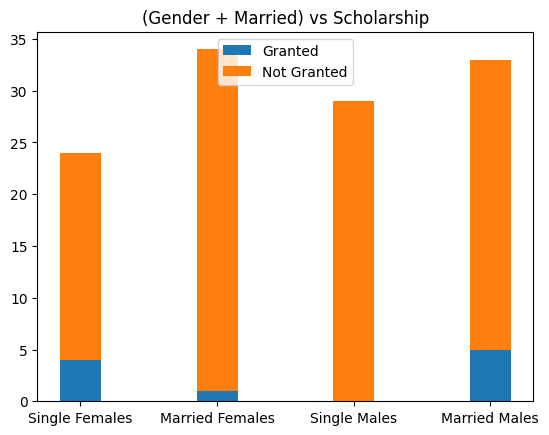

In [15]:
width = 0.3

fig, ax = plt.subplots()
bottom = np.zeros(4)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(feature_values, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("(Gender + Married) vs Scholarship")
ax.legend(loc="upper center")

plt.show()

##### <span style="color:red">Class distribution</span>

Plot class distribution

<Axes: ylabel='Count'>

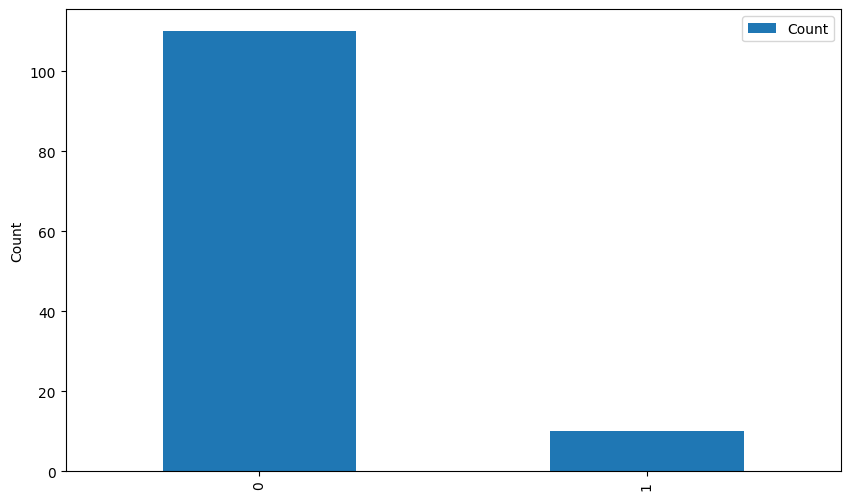

In [16]:
scholarship_index = df['scholarship'].value_counts().index
scholarship_count = df['scholarship'].value_counts().values

tmp_df = pd.DataFrame({
    'scholarship': scholarship_index,
    'Count' : scholarship_count
})

tmp_df.plot(kind='bar', figsize=(10,6), ylabel='Count')

##### <span style="color:red">Distribution of achievement</span>

Plot histogram

<Axes: xlabel='achievement', ylabel='Count'>

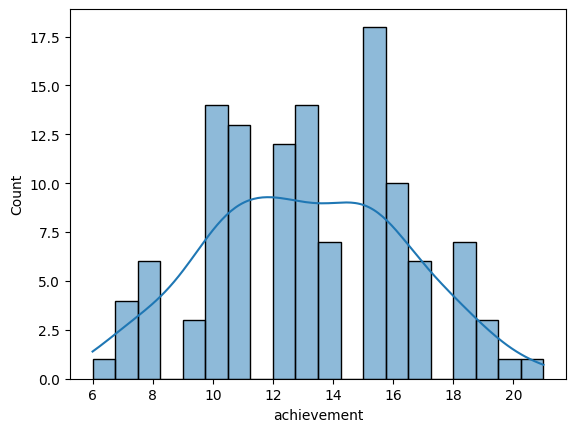

In [17]:
sns.histplot(data=df, x='achievement', kde=True, bins=20)

##### <span style="color:red">Distribution of salary</span>

Plot histogram

<Axes: xlabel='salary', ylabel='Count'>

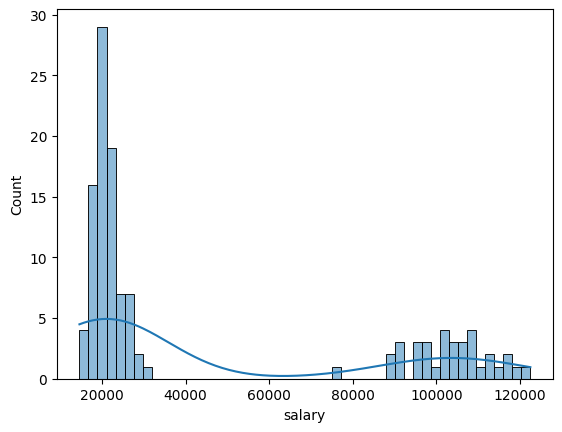

In [18]:
sns.histplot(data=df, x="salary", kde=True, bins=50)

##### <span style="color:red">Distribution of salary across classes</span>

Visualise 'salary' across classes through a boxplot

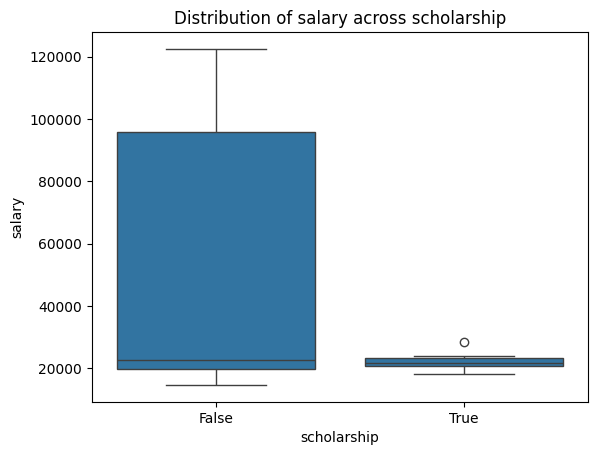

In [19]:
sns.boxplot(x="scholarship", y="salary", data=df)
plt.title("Distribution of salary across scholarship")
plt.show()

Visualise 'salary' across classes through a Violin plot

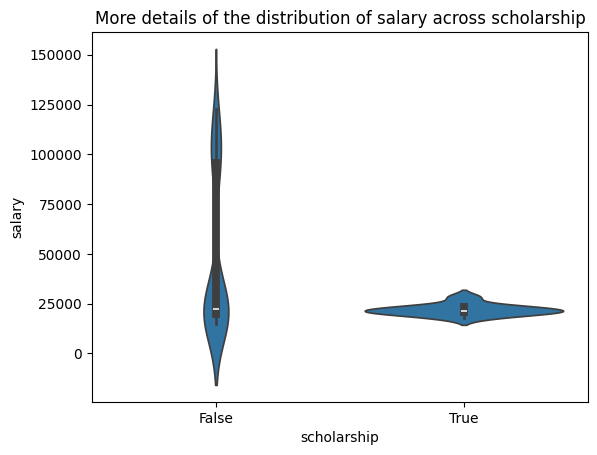

In [20]:
sns.violinplot(x="scholarship", y="salary", data=df)
plt.title("More details of the distribution of salary across scholarship")
plt.show()

Overlay histogram of salary for scholarship TRUE and FALSE

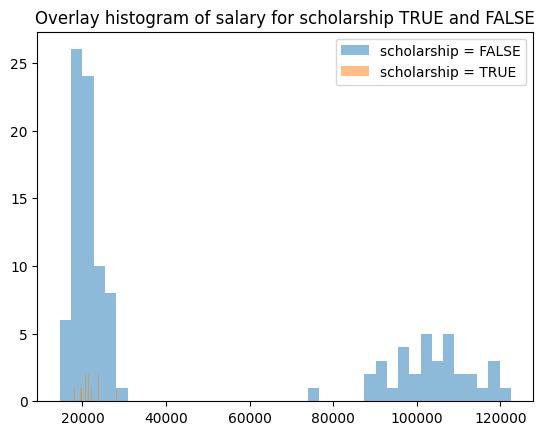

In [21]:
scholarship_false = data[data["scholarship"] == 0]["salary"]
scholarship_true = data[data["scholarship"] == 1]["salary"]

plt.hist(scholarship_false, alpha=0.5, label='scholarship = FALSE', bins=40)
plt.hist(scholarship_true, alpha=0.5, label='scholarship = TRUE', bins=40)
plt.legend()
plt.title("Overlay histogram of salary for scholarship TRUE and FALSE")
plt.show()

# Handle data

Transform feature values

In [22]:
transformed_data = data

transformed_data['gender'] = transformed_data['gender'].map({
    'F':1,
    'M':0,
})

transformed_data['married'] = transformed_data['married'].map({
    'Y':1,
    'N':0,
})

Split dataset by predictive features (X) and objective feature (y)

In [23]:
X = transformed_data.drop('scholarship', axis=1)
y = transformed_data['scholarship']

Split dataset in train and test sets

In [24]:
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.3, random_state=0)

### <span style="color:red">Hands-on exercise 1: Analyse data</span>

##### <span style="color:red">Class distribution in train and test sets</span>

Import

In [25]:
from collections import Counter

Split train and test sets

In [26]:
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.3, random_state=0)

Print class distribution per train and test sets

In [27]:
print(Counter(y))
print(Counter(y_train))
print(Counter(y_test))

Counter({False: 110, True: 10})
Counter({False: 78, True: 6})
Counter({False: 32, True: 4})


Plot class distribution in train and test sets

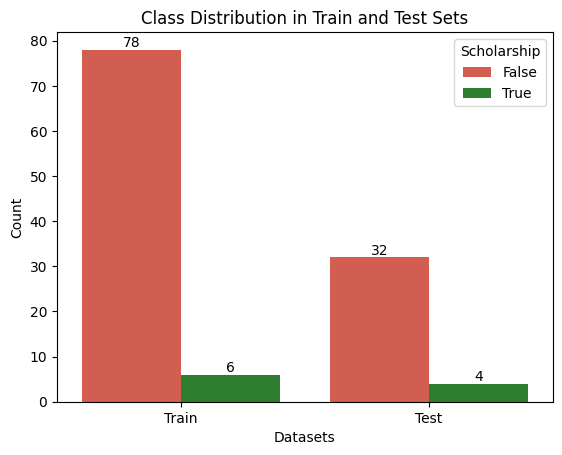

In [28]:
plot_class_distribution_train_test_sets(X_train, y_train, X_test, y_test)

# Train the classifier

Imports

In [29]:
import tensorflow.keras.models as tkm
import tensorflow.keras.layers as tkl
from tensorflow.keras.utils import plot_model

Initialize a neural network

In [30]:
model = tkm.Sequential()
model.add(tkl.Input(shape=(4,)))
model.add(tkl.Dense(12, activation='relu'))
model.add(tkl.Dense(8, activation='relu'))
model.add(tkl.Dense(1, activation='sigmoid'))

Visualise topology

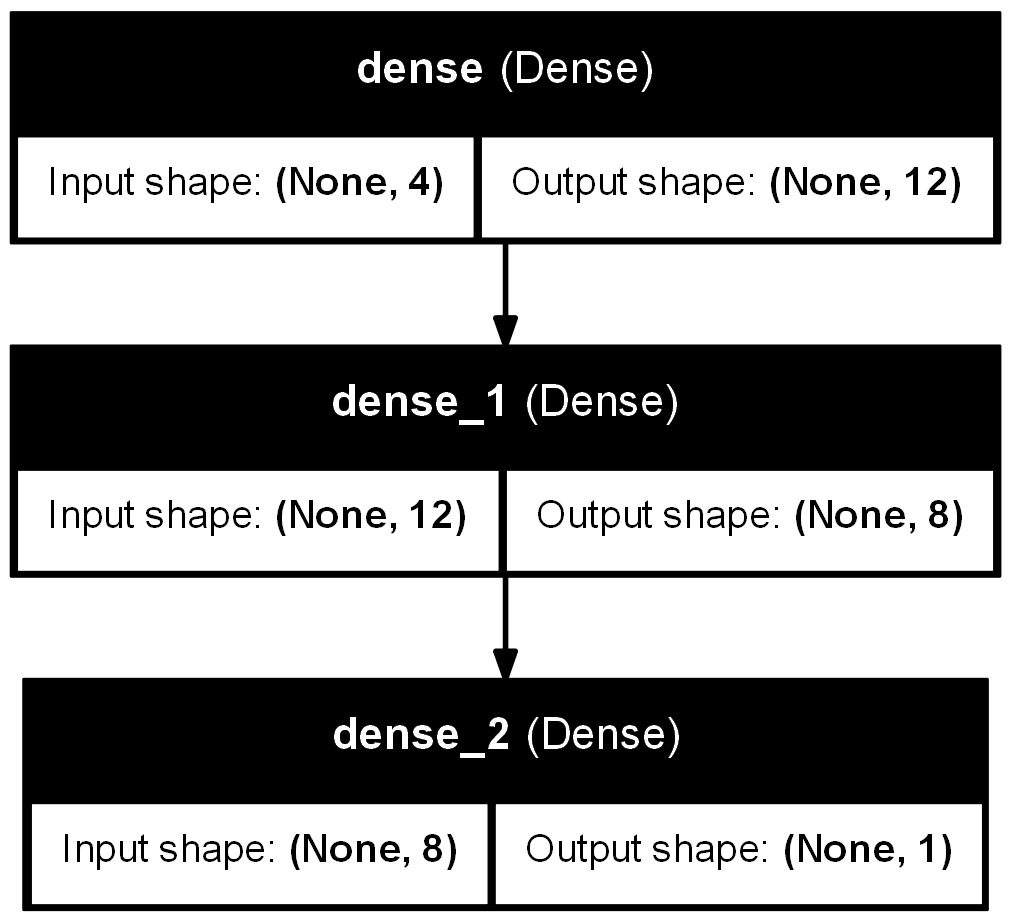

In [31]:
# Generate the model diagram
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Compile model and fit it on the dataset

In [32]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8893 - loss: 212.4454  
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9057 - loss: 113.2642 
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9187 - loss: 18.3117    
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9414 - loss: 14.1713    
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9386 - loss: 6.3935  
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9166 - loss: 14.1104 
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9360 - loss: 19.4497    
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9515 - loss: 9.5827     
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9090 - loss: 6.4747     
Epoch 10/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9413 - loss: 16.3075    
Epoch 11/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9040 - loss: 7.9895     
Epoch 12/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0

### <span style="color:red">Hands-on exercise 2: Analyse classifier</span>
<span style="color:red">a) Analyse the selected model and training</span>  
<span style="color:red">b) Identify issues that could influence results</span>  
<span style="color:red">c) Improve the classification process
</span>  
<span style="color:red">d) Summarise your main findings and potential solutions</span>

##### <span style="color:red">Play with parameter setting (number of neurons per layer, number of epochs, and batch size)</span>

Training occurs over epochs, and each epoch is split into batches
<br>
**Epoch**: One pass through all of the rows in the training dataset
<br>
**Batch**: One or more samples considered by the model within an epoch before weights are updated

**Original setting:** **12 neurons** in the first and **8 neurons** in the second hiddden layers, **150 number of epochs**, and **batch size 10**

In [33]:
# Initialize keras sequential model
model = tkm.Sequential()
model.add(tkl.Input(shape=(4,)))
model.add(tkl.Dense(12, activation='relu'))
model.add(tkl.Dense(8, activation='relu'))
model.add(tkl.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the trainset (epochs=150, batch_size=10 )
model.fit(X_train, y_train, epochs=150, batch_size=10)

# Evaluate keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9463 - loss: 308.7742
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9366 - loss: 312.5024   
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9228 - loss: 308.0466 
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9287 - loss: 241.7369 
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9296 - loss: 166.7304   
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9030 - loss: 161.9804 
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9091 - loss: 77.3841 
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8799 - loss: 9.6628     
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9579 - loss: 12.2349    
Epoch 10/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9500 - loss: 6.0152     
Epoch 11/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9545 - loss: 3.8795     
Epoch 12/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2

**Increase the number of epochs:** number of epochs = 1000

In [34]:
# Fit the model on the trainset (epochs=1000, batch_size=10 )
model.fit(X_train, y_train, epochs=1000, batch_size=10)

# Evaluate keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9081 - loss: 5.2425 
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8358 - loss: 0.5751  
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9252 - loss: 1.2904 
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9368 - loss: 1.3505 
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7791 - loss: 3.0327 
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9283 - loss: 29.5039    
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9406 - loss: 25.3672    
Epoch 8/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9436 - loss: 17.3552    
Epoch 9/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9616 - loss: 4.1256     
Epoch 10/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7456 - loss: 9.9161     
Epoch 11/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9085 - loss: 28.9153 
Epoch 12/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s

**Increase batch size:** batch size = 80

In [35]:
# Fit the model on the trainset (epochs=150, batch_size=80)
model.fit(X_train, y_train, epochs=150, batch_size=80)

# Evaluate keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9315 - loss: 0.9934
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9437 - loss: 0.3977 
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8790 - loss: 0.5235 
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9395 - loss: 0.4589 
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9274 - loss: 0.7898 
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9395 - loss: 0.4892 
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9516 - loss: 0.1481 
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9395 - loss: 0.1082 
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9437 - loss: 0.3395 
Epoch 10/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8669 - loss: 0.6583 
Epoch 11/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5885 - loss: 2.5731 
Epoch 12/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9315 - los

**Increase the number of neurons per hidden layers:**  24 neurons in the first and 12 neurons in the second hiddden layers

In [36]:
# Initialize keras sequential model
model = tkm.Sequential()
model.add(tkl.Input(shape=(4,)))
model.add(tkl.Dense(24, activation='relu'))
model.add(tkl.Dense(12, activation='relu'))
model.add(tkl.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the trainset (epochs=150, batch_size=10 )
model.fit(X_train, y_train, epochs=150, batch_size=10)

# Evaluate keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9267 - loss: 93.1624
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7066 - loss: 46.4287    
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9338 - loss: 44.8247 
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9453 - loss: 42.8677    
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9137 - loss: 55.7409  
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9351 - loss: 21.1426 
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7803 - loss: 11.4917
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9316 - loss: 20.1391    
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9126 - loss: 17.0420    
Epoch 10/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7265 - loss: 11.1040 
Epoch 11/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9338 - loss: 11.8620    
Epoch 12/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

**Setting with all suggested modifications:** **24 neurons** in the first and **12 neurons** in the second hiddden layers, **1000 number of epochs**, and **batch size 80**

In [37]:
# Initialize keras sequential model
model = tkm.Sequential()
model.add(tkl.Input(shape=(4,)))
model.add(tkl.Dense(24, activation='relu'))
model.add(tkl.Dense(12, activation='relu'))
model.add(tkl.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the trainset (epochs=1000, batch_size=80 )
model.fit(X_train, y_train, epochs=1000, batch_size=80)

# Evaluate keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9274 - loss: 69.0619
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9274 - loss: 44.9476 
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9274 - loss: 23.5292 
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8956 - loss: 16.2941
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0843 - loss: 45.6024 
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9274 - loss: 14.5739 
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9274 - loss: 26.8120 
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9274 - loss: 36.5267 
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9274 - loss: 44.2490 
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9274 - loss: 50.3676 
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9274 - loss: 55.1779 
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - a

##### <span style="color:red">Plot execution time per epoch</span>

Import

In [38]:
import time

Track execution time per epoch

In [39]:
times_per_epoch = []
epochs = 30

for epoch in range(epochs):
    start_time = time.time()  # Record start time
    model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)  # Train for one epoch
    end_time = time.time()  # Record end time
    epoch_time = end_time - start_time
    times_per_epoch.append(epoch_time)
    print(f"Epoch {epoch+1} completed in {epoch_time:.2f} seconds.")

Epoch 1 completed in 0.25 seconds.
Epoch 2 completed in 0.25 seconds.
Epoch 3 completed in 0.14 seconds.
Epoch 4 completed in 0.14 seconds.
Epoch 5 completed in 0.14 seconds.
Epoch 6 completed in 0.19 seconds.
Epoch 7 completed in 0.19 seconds.
Epoch 8 completed in 0.15 seconds.
Epoch 9 completed in 0.16 seconds.
Epoch 10 completed in 0.25 seconds.
Epoch 11 completed in 0.26 seconds.
Epoch 12 completed in 0.21 seconds.
Epoch 13 completed in 0.20 seconds.
Epoch 14 completed in 0.12 seconds.
Epoch 15 completed in 0.18 seconds.
Epoch 16 completed in 0.16 seconds.
Epoch 17 completed in 0.16 seconds.
Epoch 18 completed in 0.16 seconds.
Epoch 19 completed in 0.23 seconds.
Epoch 20 completed in 0.23 seconds.
Epoch 21 completed in 0.12 seconds.
Epoch 22 completed in 0.21 seconds.
Epoch 23 completed in 0.20 seconds.
Epoch 24 completed in 0.15 seconds.
Epoch 25 completed in 0.15 seconds.
Epoch 26 completed in 0.17 seconds.
Epoch 27 completed in 0.09 seconds.
Epoch 28 completed in 0.13 seconds.
E

Plot execution time

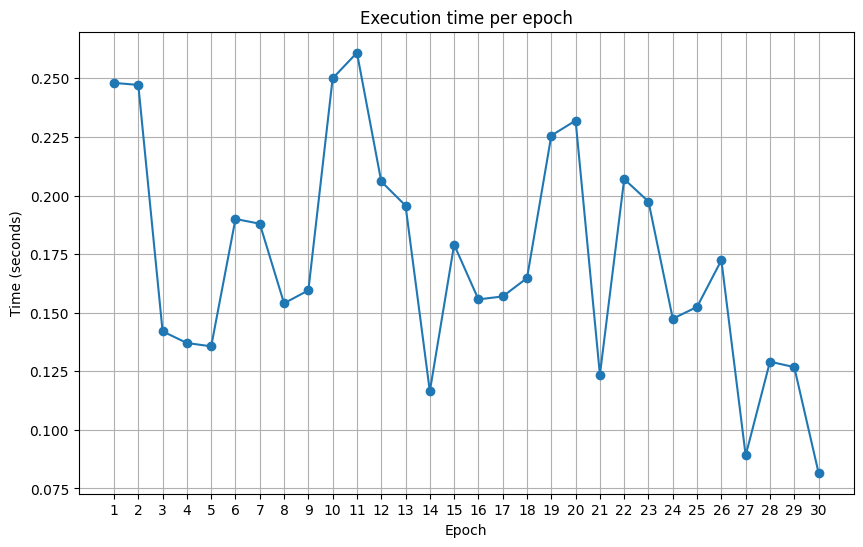

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), times_per_epoch, marker='o')
plt.title("Execution time per epoch")
plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.xticks(range(1, epochs + 1))
plt.grid(True)
plt.show()

##### <span style="color:red">Accuracy and Loss improvements</span>

Compute Accuracy and Loss per epoch

In [41]:
# Variables to track time and metrics
times_per_epoch = []
accuracy_improvements = []
loss_improvements = []
previous_accuracy = 0
previous_loss = float('inf')

# Train the model while tracking time and improvements
epochs = 30
tmp_time = 0
for epoch in range(epochs):
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)
    end_time = time.time()

    epoch_time = end_time - start_time

    # Time taken for the epoch
    tmp_time = tmp_time +  epoch_time
    times_per_epoch.append(tmp_time)

    # Accuracy and loss improvements
    current_accuracy = history.history['accuracy'][0]
    current_loss = history.history['loss'][0]

    acc_improvement = current_accuracy - previous_accuracy
    loss_improvement = previous_loss - current_loss

    accuracy_improvements.append(acc_improvement)
    loss_improvements.append(loss_improvement)

    # Update previous values
    previous_accuracy = current_accuracy
    previous_loss = current_loss

    print(f"Epoch {epoch + 1}: Time = {epoch_time:.2f}s, "
          f"Accuracy Improvement = {acc_improvement:.4f}, "
          f"Loss Improvement = {loss_improvement:.4f}")

Epoch 1: Time = 0.22s, Accuracy Improvement = 0.9286, Loss Improvement = inf
Epoch 2: Time = 0.13s, Accuracy Improvement = 0.0000, Loss Improvement = 0.0582
Epoch 3: Time = 0.14s, Accuracy Improvement = -0.0714, Loss Improvement = 1.0642
Epoch 4: Time = 0.33s, Accuracy Improvement = 0.0714, Loss Improvement = -0.0622
Epoch 5: Time = 0.16s, Accuracy Improvement = 0.0000, Loss Improvement = -0.2333
Epoch 6: Time = 0.11s, Accuracy Improvement = -0.0238, Loss Improvement = 0.4118
Epoch 7: Time = 0.08s, Accuracy Improvement = 0.0238, Loss Improvement = 0.0415
Epoch 8: Time = 0.08s, Accuracy Improvement = -0.0833, Loss Improvement = -0.1120
Epoch 9: Time = 0.07s, Accuracy Improvement = 0.0833, Loss Improvement = -0.5113
Epoch 10: Time = 0.07s, Accuracy Improvement = 0.0000, Loss Improvement = -0.5863
Epoch 11: Time = 0.07s, Accuracy Improvement = 0.0238, Loss Improvement = 1.0201
Epoch 12: Time = 0.07s, Accuracy Improvement = -0.1905, Loss Improvement = -0.3966
Epoch 13: Time = 0.07s, Accura

Plot Accuracy improvement

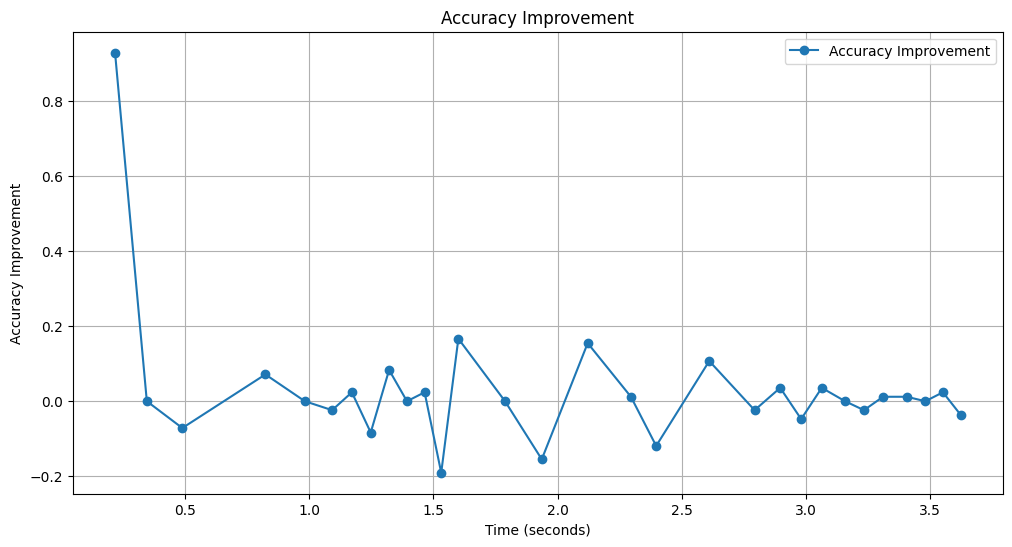

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(times_per_epoch, accuracy_improvements, marker='o', label='Accuracy Improvement')
plt.ylabel('Accuracy Improvement')
plt.xlabel('Time (seconds)')
plt.title('Accuracy Improvement')
plt.grid()
plt.legend()
plt.show()

Plot Loss improvement

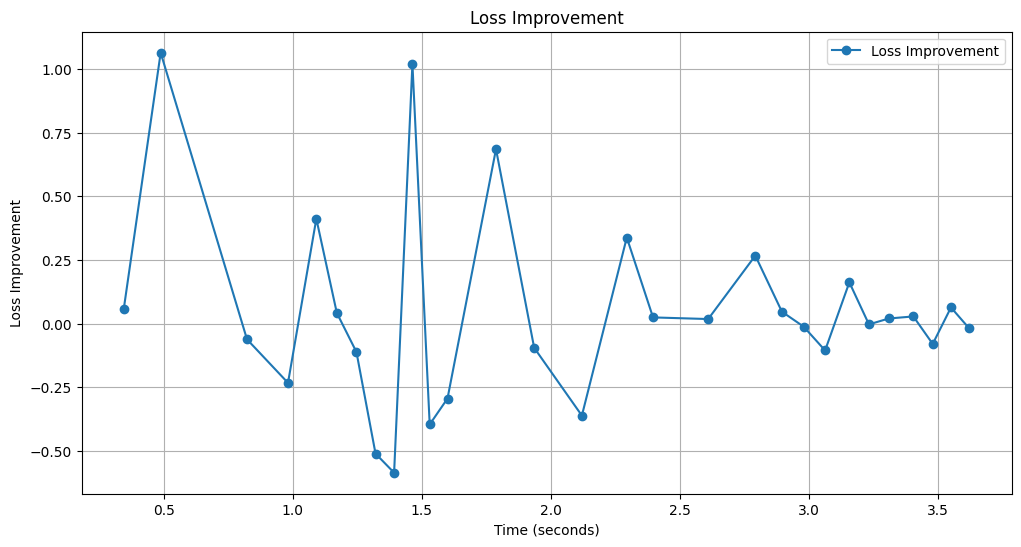

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(times_per_epoch, loss_improvements, marker='o', label='Loss Improvement')
plt.ylabel('Loss Improvement')
plt.xlabel('Time (seconds)')
plt.title('Loss Improvement')
plt.grid()
plt.legend()
plt.show()

##### <span style="color:red">Apply a classifier and create the confusion matrices for ‘married female’ and ‘single male’</span>

Import

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as skmt

Split train and test sets

In [75]:
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.3, random_state=0)

##### <span style="color:red">**Decision Tree**</span>

Initialize and fit Decision Tree

In [76]:
# Initialize Decision Tree
dtree = DecisionTreeClassifier(random_state=0)

# Fit Decision Tree on the train set
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

Make predictions and evaluate results


*************************************** DTree ***************************************
Accuracy: 88.89 %
[General]confusion matrix:
 [[30  0]
 [ 4  2]]


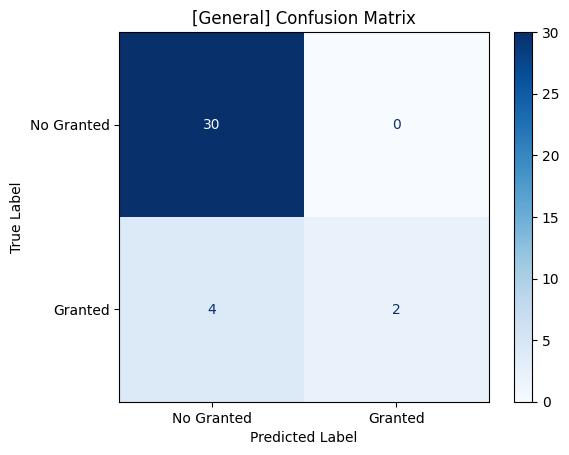

[Married female]confusion matrix:
 [[11  0]
 [ 1  0]]


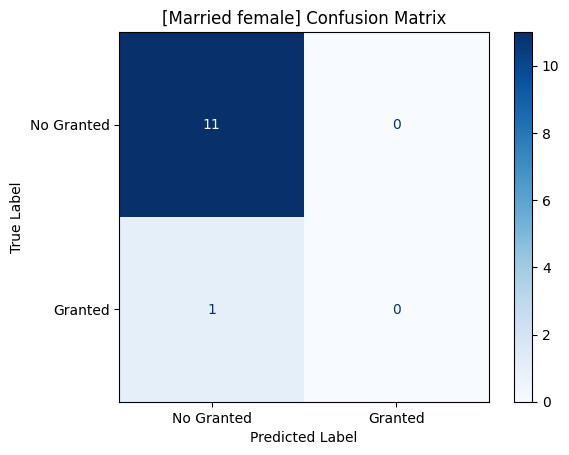

[Single male]confusion matrix:
 [[22  0]
 [ 2  2]]


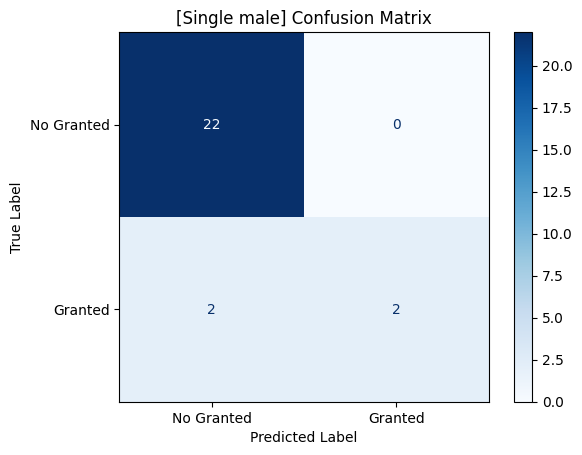

***********************************************************************************


In [77]:
# Make predictions on test set
y_pred = dtree.predict(X_test)

# Compute accuracy, general confusion matrix, and confusion matrices per protected groups
show_scholarship_prediction_results('DTree',X_test,y_test,y_pred)

##### <span style="color:red">**Random Forest**</span>

Initialize and fit Random Forest

In [78]:
# Initialize Random Forest
rfc = RandomForestClassifier(random_state=2)

# Fit Random Forest on the train set
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=2)

Make predictions and evaluate results


*************************************** RFC ***************************************
Accuracy: 86.11 %
[General]confusion matrix:
 [[30  0]
 [ 5  1]]


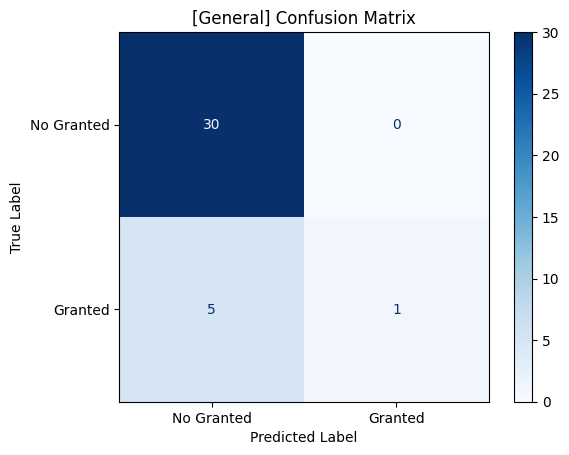

[Married female]confusion matrix:
 [[11  0]
 [ 1  0]]


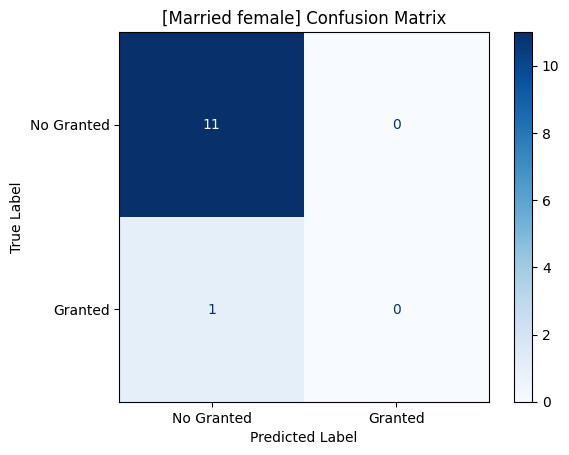

[Single male]confusion matrix:
 [[22  0]
 [ 3  1]]


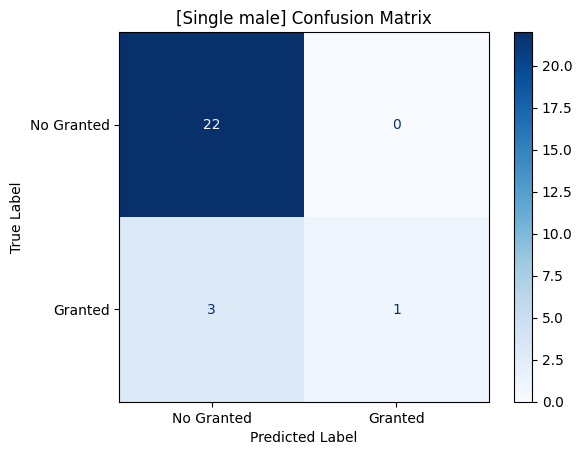

***********************************************************************************


In [79]:
# Make predictions on test set
y_pred = rfc.predict(X_test)

# Compute accuracy, balance accuracy, general confusion matrix and confusion matrices per protected groups
show_scholarship_prediction_results('RFC',X_test,y_test,y_pred)

##### <span style="color:red">**Logistic Regression**</span>

Initialize and fit Logistic Regression

In [80]:
# Initialize Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=200)

# Fit Rogistic Regression on the train set
lr.fit(X_train,y_train)

LogisticRegression(max_iter=200, random_state=42)

Make predictions and evaluate results


*************************************** LR ***************************************
Accuracy: 88.89 %
[General]confusion matrix:
 [[30  0]
 [ 4  2]]


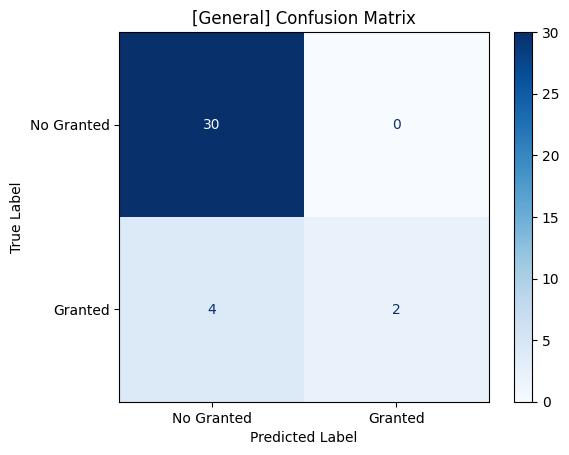

[Married female]confusion matrix:
 [[11  0]
 [ 1  0]]


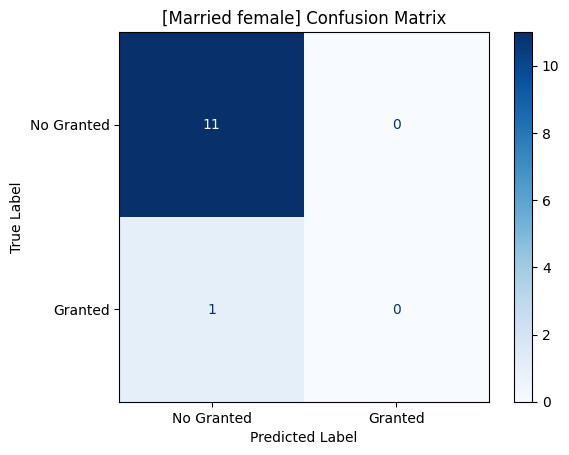

[Single male]confusion matrix:
 [[22  0]
 [ 2  2]]


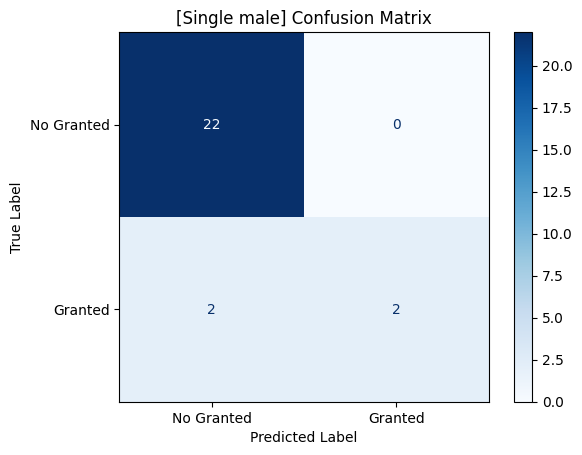

***********************************************************************************


In [81]:
# Make predictions on test set
y_pred = lr.predict(X_test)

# Compute accuracy, balance accuracy, general confusion matrix and confusion matrices per protected groups
show_scholarship_prediction_results('LR',X_test,y_test,y_pred)

##### <span style="color:red">Ask Decision Tree to classify new applicants</span>

Make predictions for the new applicant: **Salary=35760, Gender=Female, Married=No, Achievement=18**

In [106]:
feature_names = X_train.columns.tolist()

# New applicant: Salary=35760, Gender=Female, Married=No, Achievement=18
new_record = np.array([[35760, 1, 0, 18]])
new_record_df = pd.DataFrame(new_record, columns=feature_names)

# Apply the classifier to the new record to get a prediction
prediction = dtree.predict(new_record_df)

# Print the predicted class for the new record
print("Predicted class:", prediction[0])

Predicted class: True


Make predictions for the new applicant: **Salary=35760, Gender=Female, Married=Yes, Achievement=18**

In [107]:
# New applicant: Salary=35760, Gender=Female, Married=Yes, Achievement=18
new_record = np.array([[35760.0, 1, 1, 18]])
new_record_df = pd.DataFrame(new_record, columns=feature_names)

# Apply the classifier to the new record to get a prediction
prediction = rfc.predict(new_record_df)

# Print the predicted class for the new record
print("Predicted class:", prediction[0])

Predicted class: False


# Eval the classifier

**Original setting:** **12 neurons** in the first and **8 neurons** in the second hiddden layers, **150 number of epochs**, and **batch size 10**

In [83]:
# Initialize keras sequential model
model = tkm.Sequential()
model.add(tkl.Input(shape=(4,)))
model.add(tkl.Dense(12, activation='relu'))
model.add(tkl.Dense(8, activation='relu'))
model.add(tkl.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the trainset (epochs=150, batch_size=10 )
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0724 - loss: 8966.7910 
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0482 - loss: 7012.6006     
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0523 - loss: 5883.1367     
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0351 - loss: 3939.1450     
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0556 - loss: 2511.9888 
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0528 - loss: 776.8065 
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9717 - loss: 9.3502     
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9641 - loss: 22.9177    
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9677 - loss: 23.9467    
Epoch 10/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9477 - loss: 40.2970     
Epoch 11/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9396 - loss: 44.2910  
Epoch 12/150
9/9 ━━━━━━━━━

Evaluate the keras model

In [85]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8368 - loss: 22.3613 
Accuracy: 83.33


### <span style="color:red">Hands-on exercise 3: Analyse evaluation</span>
<span style="color:red">a) Analyse the classification results</span>  
<span style="color:red">b) Identify issues in the ‘model evaluation’ task</span>  
<span style="color:red">c) Modify the ‘model evaluation’ task if needed</span>  
<span style="color:red">d) Summarise your main findings and potential solutions</span>

##### <span style="color:red">Confusion matrix</span>

Compute confusion matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[General]confusion matrix:
 [[30  0]
 [ 6  0]]


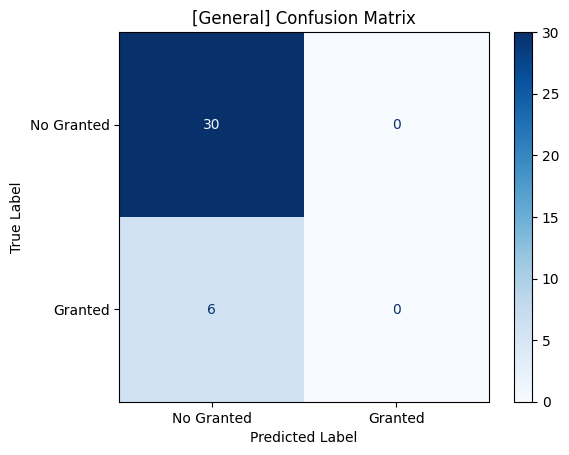

In [94]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=-1)
compute_confusion_matrix('General', y_test, y_pred)

##### <span style="color:red">ROC curve and AUC value</span>

Import

In [89]:
from sklearn.metrics import roc_curve, auc 

Get the predicted probabilities for the test set

In [95]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [90]:
y_pred_probs = model.predict(X_test)
print(y_pred_probs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


Compute ROC curve and AUC for each class (binary example)

In [96]:
fpr, tpr, _ = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)

Plot the ROC curve

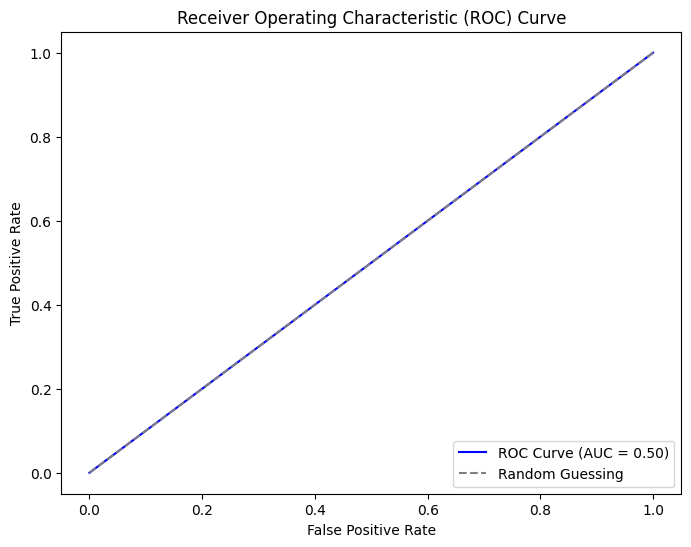

In [97]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guessing")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()